In [1]:
#https://www.freecodecamp.org/news/how-to-build-your-first-neural-network-to-predict-house-prices-with-keras-f8db83049159/

'''
Exploring and Processing the Data
Building and Training our Neural Network
Visualizing Loss and Accuracy
Adding Regularization to our Neural Network
'''

'\nExploring and Processing the Data\nBuilding and Training our Neural Network\nVisualizing Loss and Accuracy\nAdding Regularization to our Neural Network\n'

In [12]:
import pandas as pd
#https://www.youtube.com/watch?v=2IpFKLohxOI
# shuffle the generated data
#ds = df.sample(frac=1)

df = pd.read_csv('housepricedata.csv')
df.head(5)

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1


In [13]:
dataset = df.values
dataset

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]], dtype=int64)

In [14]:
X = dataset[:, 0:10]
Y = dataset[:,10]

In [15]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler() 
X_scale = min_max_scaler.fit_transform(X)
X_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [16]:
from sklearn.model_selection import train_test_split
#splitting of train and test set
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)
#splitting of test and validaiton set
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


In [20]:
#Setting up the architecture
'''
Hidden layer 1: 32 neurons, ReLU activation
Hidden layer 2: 32 neurons, ReLU activation
Output Layer: 1 neuron, Sigmoid activation
'''
from keras.models import Sequential
from keras.layers import Dense
'''
#binary classification
model = Sequential([    
    Dense(32, activation='relu', input_shape=(10,)),    
    Dense(32, activation='relu'),    
    Dense(1, activation='sigmoid'),])
'''
model = Sequential([    
    Dense(32, activation='relu', input_shape=(10,)),    
    Dense(32, activation='relu'),    
    Dense(1, activation='sigmoid'),])

In [21]:
model.compile(optimizer='sgd',              
              loss='binary_crossentropy',              
              metrics=['accuracy'])

In [22]:
hist = model.fit(X_train, Y_train,          
                 batch_size=32, epochs=100,          
                 validation_data=(X_val, Y_val))

Train on 1022 samples, validate on 219 samples
Epoch 1/100
1022/1022 [==============================] - 0s 123us/step - loss: 0.6740 - accuracy: 0.6086 - val_loss: 0.6695 - val_accuracy: 0.6438
Epoch 2/100
1022/1022 [==============================] - 0s 41us/step - loss: 0.6668 - accuracy: 0.6654 - val_loss: 0.6626 - val_accuracy: 0.6986
Epoch 3/100
1022/1022 [==============================] - 0s 43us/step - loss: 0.6596 - accuracy: 0.6928 - val_loss: 0.6552 - val_accuracy: 0.7443
Epoch 4/100
1022/1022 [==============================] - 0s 41us/step - loss: 0.6519 - accuracy: 0.7221 - val_loss: 0.6475 - val_accuracy: 0.7489
Epoch 5/100
1022/1022 [==============================] - 0s 44us/step - loss: 0.6440 - accuracy: 0.7564 - val_loss: 0.6399 - val_accuracy: 0.7580
Epoch 6/100
1022/1022 [==============================] - 0s 44us/step - loss: 0.6365 - accuracy: 0.7857 - val_loss: 0.6326 - val_accuracy: 0.7671
Epoch 7/100
1022/1022 [==============================] - 0s 45us/step - loss

1022/1022 [==============================] - 0s 41us/step - loss: 0.3235 - accuracy: 0.8777 - val_loss: 0.3289 - val_accuracy: 0.8767
Epoch 57/100
1022/1022 [==============================] - 0s 40us/step - loss: 0.3218 - accuracy: 0.8806 - val_loss: 0.3271 - val_accuracy: 0.8767
Epoch 58/100
1022/1022 [==============================] - 0s 39us/step - loss: 0.3200 - accuracy: 0.8757 - val_loss: 0.3257 - val_accuracy: 0.8767
Epoch 59/100
1022/1022 [==============================] - 0s 42us/step - loss: 0.3181 - accuracy: 0.8806 - val_loss: 0.3240 - val_accuracy: 0.8767
Epoch 60/100
1022/1022 [==============================] - 0s 43us/step - loss: 0.3163 - accuracy: 0.8806 - val_loss: 0.3223 - val_accuracy: 0.8767
Epoch 61/100
1022/1022 [==============================] - 0s 40us/step - loss: 0.3148 - accuracy: 0.8796 - val_loss: 0.3205 - val_accuracy: 0.8767
Epoch 62/100
1022/1022 [==============================] - 0s 40us/step - loss: 0.3132 - accuracy: 0.8845 - val_loss: 0.3190 - val_a

In [30]:
# have the index 1 after the model.evaluate function is because the function returns 
# the loss as the first element and the accuracy as the second element. 
model.evaluate(X_test, Y_test)[1]

219/219 [==============================] - 0s 27us/step


0.8630136847496033

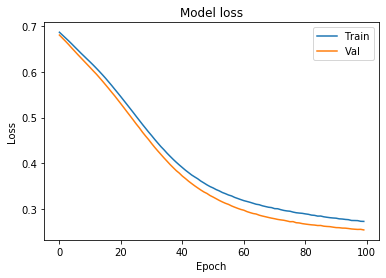

In [31]:
# Visualizing Loss and Accuracy
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

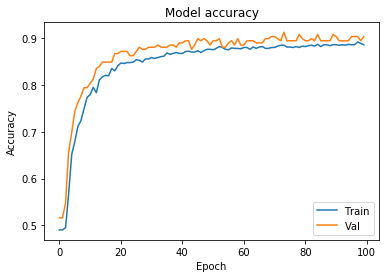

In [34]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [36]:
#Adding Regularization
'''
Adam is one of the most common optimizers we use, which adds some tweaks to stochastic gradient descent such that it reaches the lower loss function faster.
'''
model_2 = Sequential([    
    Dense(1000, activation='relu', input_shape=(10,)),    
    Dense(1000, activation='relu'),    
    Dense(1000, activation='relu'),    
    Dense(1000, activation='relu'),    
    Dense(1, activation='sigmoid'),])

model_2.compile(optimizer='adam',              
                loss='binary_crossentropy',              
                metrics=['accuracy'])

hist_2 = model_2.fit(X_train, Y_train,          
                     batch_size=32, epochs=100,          
                     validation_data=(X_val, Y_val))

Train on 1022 samples, validate on 219 samples
Epoch 1/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.4602 - accuracy: 0.7779 - val_loss: 0.3360 - val_accuracy: 0.8721
Epoch 2/100
1022/1022 [==============================] - 1s 1ms/step - loss: 0.3368 - accuracy: 0.8562 - val_loss: 0.2726 - val_accuracy: 0.8995
Epoch 3/100
1022/1022 [==============================] - 1s 1ms/step - loss: 0.2905 - accuracy: 0.8787 - val_loss: 0.2479 - val_accuracy: 0.8995
Epoch 4/100
1022/1022 [==============================] - 1s 1ms/step - loss: 0.2603 - accuracy: 0.8894 - val_loss: 0.2693 - val_accuracy: 0.9041
Epoch 5/100
1022/1022 [==============================] - 1s 1ms/step - loss: 0.2777 - accuracy: 0.8816 - val_loss: 0.2202 - val_accuracy: 0.9224
Epoch 6/100
1022/1022 [==============================] - 1s 1ms/step - loss: 0.2563 - accuracy: 0.8924 - val_loss: 0.2731 - val_accuracy: 0.8584
Epoch 7/100
1022/1022 [==============================] - 1s 1ms/step - loss: 0.2673

Epoch 57/100
1022/1022 [==============================] - 1s 1ms/step - loss: 0.2039 - accuracy: 0.9178 - val_loss: 0.2402 - val_accuracy: 0.9087
Epoch 58/100
1022/1022 [==============================] - 1s 1ms/step - loss: 0.1782 - accuracy: 0.9247 - val_loss: 0.2910 - val_accuracy: 0.8630
Epoch 59/100
1022/1022 [==============================] - 1s 1ms/step - loss: 0.1668 - accuracy: 0.9325 - val_loss: 0.2751 - val_accuracy: 0.8904
Epoch 60/100
1022/1022 [==============================] - 1s 1ms/step - loss: 0.1498 - accuracy: 0.9374 - val_loss: 0.2669 - val_accuracy: 0.9087
Epoch 61/100
1022/1022 [==============================] - 1s 1ms/step - loss: 0.1491 - accuracy: 0.9354 - val_loss: 0.3173 - val_accuracy: 0.8950
Epoch 62/100
1022/1022 [==============================] - 1s 1ms/step - loss: 0.1359 - accuracy: 0.9384 - val_loss: 0.3569 - val_accuracy: 0.8995
Epoch 63/100
1022/1022 [==============================] - 1s 1ms/step - loss: 0.1516 - accuracy: 0.9286 - val_loss: 0.3141 -

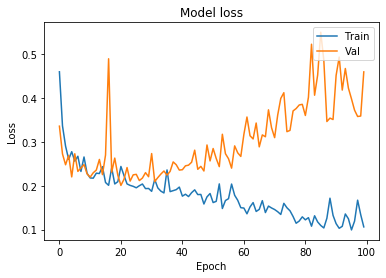

In [37]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

# this is over-fitting

In [39]:
#deal with over-fitting problem
from keras.layers import Dropout
from keras import regularizers

model_3 = Sequential([    
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)),    
    Dropout(0.3),    
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),    
    Dropout(0.3),    
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),    
    Dropout(0.3),    
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),    
    Dropout(0.3),    
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),])

model_3.compile(optimizer='adam',              
                loss='binary_crossentropy',              
                metrics=['accuracy'])

hist_3 = model_3.fit(X_train, Y_train,          
                     batch_size=32, epochs=100,          
                     validation_data=(X_val, Y_val))

Train on 1022 samples, validate on 219 samples
Epoch 1/100
1022/1022 [==============================] - 2s 2ms/step - loss: 14.2377 - accuracy: 0.6194 - val_loss: 3.8743 - val_accuracy: 0.7945
Epoch 2/100
1022/1022 [==============================] - 2s 2ms/step - loss: 1.6784 - accuracy: 0.8386 - val_loss: 0.6495 - val_accuracy: 0.8630
Epoch 3/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.5859 - accuracy: 0.8611 - val_loss: 0.4810 - val_accuracy: 0.8767
Epoch 4/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.5027 - accuracy: 0.8581 - val_loss: 0.4474 - val_accuracy: 0.8995
Epoch 5/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.5040 - accuracy: 0.8640 - val_loss: 0.4841 - val_accuracy: 0.8630
Epoch 6/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.4867 - accuracy: 0.8767 - val_loss: 0.5133 - val_accuracy: 0.8311
Epoch 7/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.498

Epoch 57/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.4353 - accuracy: 0.8914 - val_loss: 0.4100 - val_accuracy: 0.8813
Epoch 58/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.4248 - accuracy: 0.8885 - val_loss: 0.4527 - val_accuracy: 0.8767
Epoch 59/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.4349 - accuracy: 0.8933 - val_loss: 0.4046 - val_accuracy: 0.9041
Epoch 60/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.4330 - accuracy: 0.8875 - val_loss: 0.4259 - val_accuracy: 0.8813
Epoch 61/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.4208 - accuracy: 0.8943 - val_loss: 0.4202 - val_accuracy: 0.8767
Epoch 62/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.4448 - accuracy: 0.8777 - val_loss: 0.4094 - val_accuracy: 0.8995
Epoch 63/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.4392 - accuracy: 0.8777 - val_loss: 0.4943 -

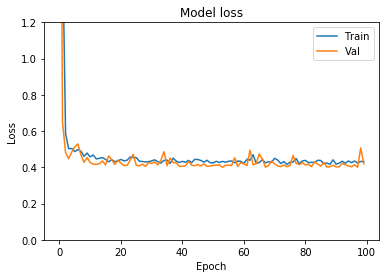

In [42]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

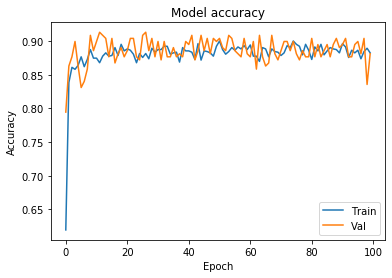

In [43]:
plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()


In [ ]:
# SUMMARY
'''
Explore and Process the Data
Build and Train our Neural Network
Visualize Loss and Accuracy
Add Regularization to our Neural Network
'''